# Decision Tree Classifier

This notebook demonstrates how to implement a Decision Tree Classifier using Scikit-Learn.
We will:
- Load and explore a dataset (Iris dataset)
- Train a Decision Tree model
- Visualize the decision boundaries
- Evaluate model performance

# **Step 1: Import Required Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Step 2: Load the Dataset**

In [5]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [7]:
# Display first 5 rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Step 3: Split Data into Training and Testing Sets**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 4: Train the Decision Tree Model**

In [11]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# **Step 4.5 (Optional): Hyperparameter Tuning**

In [19]:
# (Optional): Experimenting with Different Tree Depths
depths = [2, 3, 4, 5]
for depth in depths:
    temp_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    temp_model.fit(X_train, y_train)
    temp_accuracy = accuracy_score(y_test, temp_model.predict(X_test))
    print(f"Max Depth: {depth}, Accuracy: {temp_accuracy:.2f}")

Max Depth: 2, Accuracy: 0.97
Max Depth: 3, Accuracy: 1.00
Max Depth: 4, Accuracy: 1.00
Max Depth: 5, Accuracy: 1.00


# **Step 5: Make Predictions**

In [13]:
y_pred = clf.predict(X_test)

# **Step 6: Evaluate Model Performance**

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Step 7: Visualize Confusion Matrix**

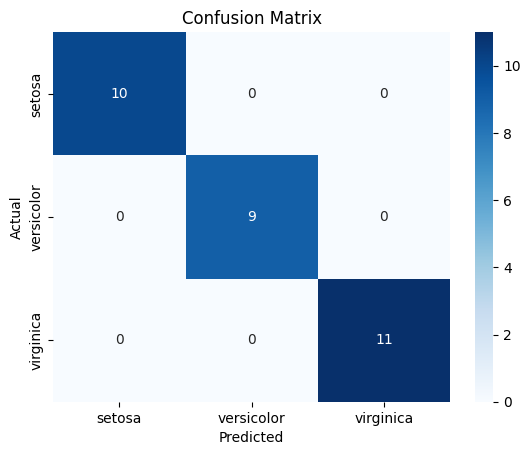

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Step 8: Visualize the Decision Tree**

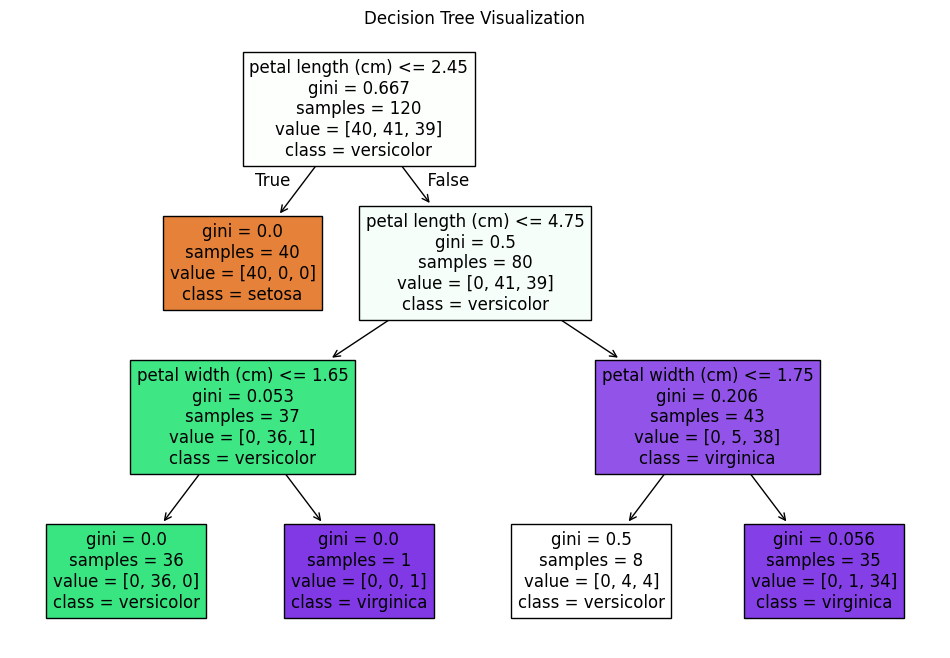

In [16]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# **Step 9: Feature Importance**

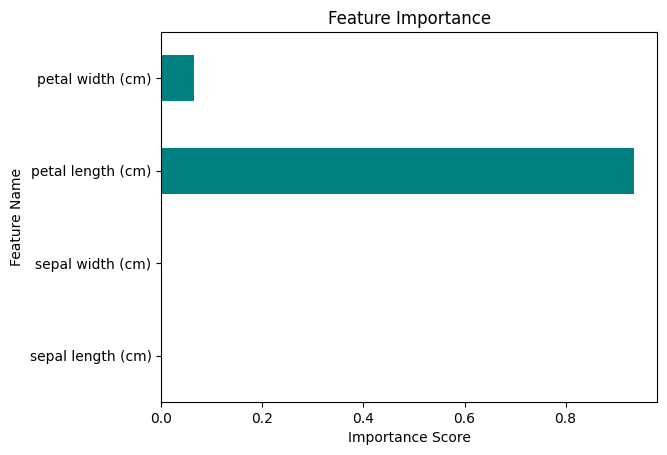

In [18]:
feature_importances = pd.Series(clf.feature_importances_, index=iris.feature_names)
feature_importances.plot(kind="barh", title="Feature Importance", color='teal')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

## Next Steps
- Experiment with different hyperparameters (e.g., `max_depth`, `criterion`)
- Try different datasets
- Compare Decision Tree with other classification algorithms